In [2]:
# Python 3
import jpeg as JPEG
import libs.ruidos as ruido
import libs.metricas as metricas
from skimage import io
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from scipy import fftpack
from scipy.ndimage import filters


In [3]:
def get_2D_dct(img):
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def get_2d_idct(coefficients):
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

# No usar bloques
La idea es ver que no está bueno aplicar la DCT a la imagen completa

In [ ]:
# img = np.transpose(io.imread('bmp/homogenea.bmp'))
img = io.imread('bmp/no_homogenea.bmp')
img_dct = get_2D_dct(img)
io.imsave('latex/fig/no_homogenea.png',img)

# máscara
menores_coef_mask = np.flip(np.tril(np.ones(img.shape),0),0)

img_dct_trimmed = np.multiply(img_dct,menores_coef_mask)
# recorto coeficientes
img2 = get_2d_idct(img_dct_trimmed).clip(0,255).astype('uint8')

# muestro
plt.figure(figsize=(15,15))

plt.subplot(1,4,1)
plt.imshow(img_dct,cmap='gray')
plt.title('DCT')

plt.subplot(1,4,2)
plt.imshow(menores_coef_mask,cmap='gray')
plt.title('mask')

plt.subplot(1,4,3)
plt.imshow(img_dct_trimmed,cmap='gray')
plt.title('DCT - recortada')

plt.subplot(1,4,4)
plt.imshow(img2,cmap='gray')
plt.title('comprimida')

plt.show()

plt.figure(figsize=(15,15))
plt.imshow(img2,cmap='gray')
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(img,cmap='gray')
plt.show()

io.imsave('latex/fig/no_homogenea_comprimida.png',img2)

# Las frecuencias bajas tienen más información
La idea es ver que las frecuencias bajas tienen más información que las altas, para el ojo humano.

In [ ]:

img = io.imread('bmp/lena.bmp')[:,:,0]
dct_size = img.shape[0]
dct = get_2D_dct(img)
reconstructed_images = []

for ii in range(dct_size):
    dct_copy = dct.copy()
    
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0

    # Reconstructed image
    reconstructed_image = get_2d_idct(dct_copy)

    # Create a list of images
    reconstructed_images.append(reconstructed_image)

In [ ]:
fig = plt.figure(figsize=(10,7))
for ii in range(40):
    plt.subplot(5,8, ii+1)
    plt.imshow(reconstructed_images[ii], cmap='gray')
    plt.axis('off')
#     plt.tight_layout()
plt.savefig('latex/fig/lenas.png',bbox_inches='tight')
plt.show()

io.imsave('latex/fig/lenas_100frecuencias.png',np.array(reconstructed_images[100].clip(0,255),dtype=np.uint8))

Ahora veamos cómo se reconstruye Lena con las primeras 100 frecuencias nada más. Se ve, pero tiene artifacts groseros.

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(reconstructed_images[100],cmap='gray')
plt.show()

# Señal y su DCT
La idea es poner un ejemplo de DCT, y notar que cuando la imagen es suave la DCT concentra energía.

In [ ]:
# 8x8 random y su DCT
img = np.array(np.random.rand(8,8)*255,dtype=np.int)
img = filters.gaussian_filter(img, 1.2) -128

dct = get_2D_dct(img)


fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(img,cmap='gray')
for (j,i),label in np.ndenumerate(img):
    ax.text(i,j,label,ha='center',va='center',fontsize=25,color='r')
ax.tick_params(labelsize=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('latex/fig/8x8random.png')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(dct,cmap='gray')
for (j,i),label in np.ndenumerate(dct):
    ax.text(i,j,"{0:.1f}".format(label),ha='center',va='center',fontsize=25,color='r')
ax.tick_params(labelsize=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('latex/fig/8x8random_dct.png')
plt.show()


5.70695488278
2.43608345556


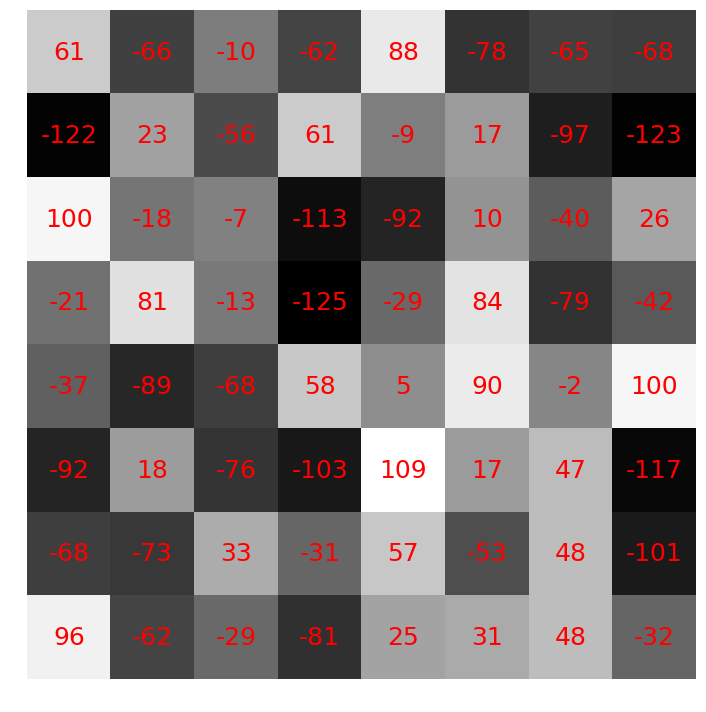

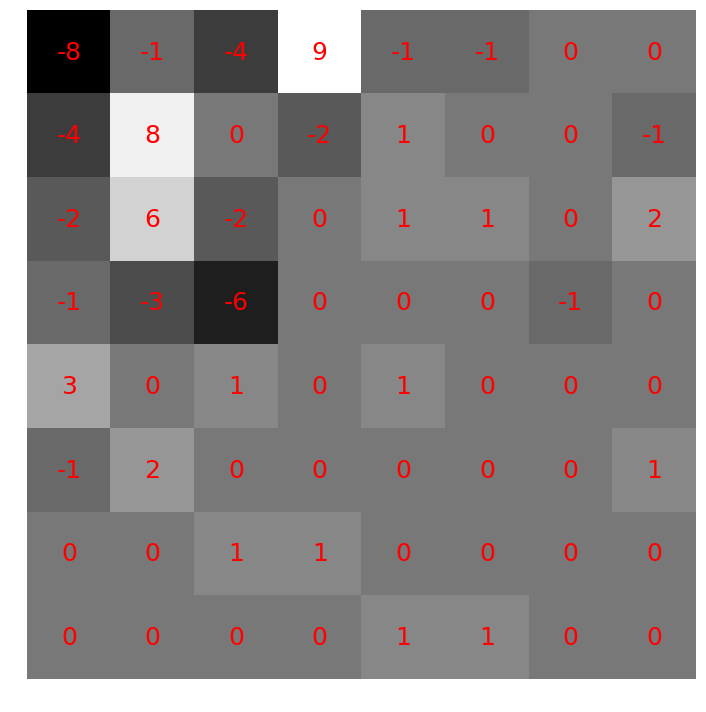

In [14]:
# 8x8 random y su DCT

# Veamos la entropía al cuantizar

QTable = np.array([\
        [16,11,10,16,24,40,51,61],\
        [12,12,14,19,26,58,60,55],\
        [14,13,16,24,40,57,69,56],\
        [14,17,22,29,51,87,80,62],\
        [18,22,37,56,68,109,103,77],\
        [24,35,55,64,81,104,113,92],\
        [49,64,78,87,103,121,120,101],\
        [72,92,95,98,112,100,103,99],\
        ])


# img = np.array(np.random.rand(8,8)*255,dtype=np.int)
# img = filters.gaussian_filter(img, 1.2) -128

# dct = get_2D_dct(img)

# dct = np.array(np.divide(dct,QTable), dtype=np.int8)

# print(metricas.entropy(img))
# print(metricas.entropy(dct))

# fig, ax = plt.subplots(figsize=(10,10))
# plt.imshow(img,cmap='gray')
# for (j,i),label in np.ndenumerate(img):
#     ax.text(i,j,label,ha='center',va='center',fontsize=25,color='r')
# ax.tick_params(labelsize=20)
# plt.axis('off')
# plt.tight_layout()
# plt.savefig('latex/fig/8x8random_entropy.png')
# plt.show()

# fig, ax = plt.subplots(figsize=(10,10))
# plt.imshow(dct,cmap='gray')
# for (j,i),label in np.ndenumerate(dct):
#     ax.text(i,j,label,ha='center',va='center',fontsize=25,color='r')
# ax.tick_params(labelsize=20)
# plt.axis('off')
# plt.tight_layout()
# plt.savefig('latex/fig/8x8random_dct_entropy.png')
# plt.show()




img = np.array(np.random.rand(8,8)*255,dtype=np.int) - 128
# img = filters.gaussian_filter(img, 0.00) -128

dct = get_2D_dct(img)

dct = np.array(np.divide(dct,QTable), dtype=np.int8)

print(metricas.entropy(img))
print(metricas.entropy(dct))

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(img,cmap='gray')
for (j,i),label in np.ndenumerate(img):
    ax.text(i,j,label,ha='center',va='center',fontsize=25,color='r')
ax.tick_params(labelsize=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('latex/fig/8x8random_entropy2.png')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(dct,cmap='gray')
for (j,i),label in np.ndenumerate(dct):
    ax.text(i,j,label,ha='center',va='center',fontsize=25,color='r')
ax.tick_params(labelsize=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('latex/fig/8x8random_dct_entropy2.png')
plt.show()





Ahora mostrar que cuando no es suave, la DCT no concentra energía.

In [ ]:
# distintos 8x8 y sus dct
sigmas = [0.1,1,2,5]

n = 0
for sigma in sigmas:

    img = np.array(np.random.rand(8,8)*255,dtype=np.int)
    img = filters.gaussian_filter(img, sigma) -128
    dct = get_2D_dct(img)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.imshow(img,cmap='gray')
    for (j,i),label in np.ndenumerate(img):
        ax.text(i,j,label,ha='center',va='center',fontsize=25,color='r')
    ax.tick_params(labelsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('latex/fig/8x8random'+str(n)+'.png')
    plt.show()

    fig, ax = plt.subplots(figsize=(10,10))
    plt.imshow(dct,cmap='gray')
    for (j,i),label in np.ndenumerate(dct):
        ax.text(i,j,"{0:.1f}".format(label),ha='center',va='center',fontsize=25,color='r')
    ax.tick_params(labelsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('latex/fig/8x8random_dct'+str(n)+'.png')
    plt.show()
    n += 1


# Compresión y calidad
La idea es ver cómo cambia la calidad de la imagen con más compresión

In [ ]:
def JPEG_compress(img, Q, NM = (8,8), QTable = np.array([\
        [16,11,10,16,24,40,51,61],\
        [12,12,14,19,26,58,60,55],\
        [14,13,16,24,40,57,69,56],\
        [14,17,22,29,51,87,80,62],\
        [18,22,37,56,68,109,103,77],\
        [24,35,55,64,81,104,113,92],\
        [49,64,78,87,103,121,120,101],\
        [72,92,95,98,112,100,103,99],\
        ])):
    
    jpeg = JPEG.jpeg_encode(img,Q, NM, QTable)
    bytes = jpeg.size()
    img2 = JPEG.jpeg_decode(jpeg)
    return (img2, bytes)

In [ ]:
%autoreload
def comprimir_y_medir(img,QQ):
    sizes = []
    imgs = []
    for Q in QQ:
        print('Comprimiendo con Q =',Q)
        (img2,size) = JPEG_compress(img, Q)
        sizes.append(size)
        imgs.append(img2)
    return (imgs, sizes)

In [ ]:
QQ = np.arange(50,102,2)

lena = io.imread('bmp/lena.bmp')
(lenas, lenas_sizes) = comprimir_y_medir(lena, QQ)

paisaje = io.imread('bmp/landscape.jpg')
(paisajes, paisajes_sizes) = comprimir_y_medir(paisaje, QQ)

txt = io.imread('bmp/text.bmp')
(txts, txt_sizes) = comprimir_y_medir(txt, QQ)

In [ ]:
lena_size = lena.shape[0] * lena.shape[1]* lena.shape[2]
paisaje_size = paisaje.shape[0] * paisaje.shape[1]* paisaje.shape[2]
txt_size = txt.shape[0] * txt.shape[1]* txt.shape[2]

PSNR_lenas = [metricas.PSNR(lena, img2) for img2 in lenas]
MSE_lenas = [metricas.MSE(lena, img2) for img2 in lenas]
FC_lenas = [metricas.FC(lena_size, size) for size in lenas_sizes]

PSNR_paisajes = [metricas.PSNR(paisaje, img2) for img2 in paisajes]
MSE_paisajes = [metricas.MSE(paisaje, img2) for img2 in paisajes]
FC_paisajes = [metricas.FC(paisaje_size, size) for size in paisajes_sizes]

PSNR_txts = [metricas.PSNR(txt, img2) for img2 in txts]
MSE_txts = [metricas.MSE(txt, img2) for img2 in txts]
FC_txts = [metricas.FC(txt_size, size) for size in txt_sizes]


In [ ]:
np.save('muchasdata.dat',(PSNR_lenas, MSE_lenas, FC_lenas, PSNR_paisajes, MSE_paisajes,FC_paisajes, PSNR_txts, MSE_txts, FC_txts))


In [ ]:
(PSNR_lenas, MSE_lenas, FC_lenas, PSNR_paisajes, MSE_paisajes,FC_paisajes, PSNR_txts, MSE_txts, FC_txts) = np.load('muchasdata.dat.npy')
# plt.figure(figsize=(30,30))
# for i in range(len(QQ)):
#     plt.subplot(1,len(QQ),i+1)
#     plt.imshow(imgs[i])
#     plt.title(sizes[i],fontsize=30)
# plt.show()


plt.plot(FC_lenas, MSE_lenas,label='Lena')
plt.plot(FC_paisajes, MSE_paisajes,label='Paisaje')
plt.plot(FC_txts, MSE_txts, label='Texto')
plt.legend()
plt.ylabel('ECM')
plt.xlabel('Factor de compresión')

plt.savefig('latex/fig/FCvsECM.pdf')
plt.show()



In [ ]:
lena = io.imread('bmp/lena.bmp')
paisaje = io.imread('bmp/landscape.jpg')
txt = io.imread('bmp/text.bmp')

(img, size) = JPEG_compress(lena,80)
io.imsave('latex/fig/lena_80.png',img)
print(metricas.MSE(lena,img))

(img, size) = JPEG_compress(paisaje,80)
io.imsave('latex/fig/paisaje_80.png',img)
print(metricas.MSE(paisaje,img))

(img, size) = JPEG_compress(txt,80)
io.imsave('latex/fig/txt_80.png',img)
print(metricas.MSE(txt,img))
